In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import networkx as nx
import numpy as np

In [17]:
G = nx.DiGraph()

In [18]:
df_se = pd.read_csv('./sheep_data/sheep_edges.csv')
df_sa = pd.read_csv('./sheep_data/sheep_age.csv')

In [19]:
df_se['source'] = df_se['source'].astype(str) 
df_se['target'] = df_se['target'].astype(str) 
df_se['weight'] = df_se['weight'].astype(int) 


In [20]:
print(df_se)

    source target  weight
0        1      2       1
1        1      3       1
2        1      4       1
3        1      5       1
4        1      6       1
5        7      8       5
6        7      9       2
7        7     10       1
8        7      3       4
9        7     11       1
10       7      4       2
11       7     12       1
12       7     13       4
13       7     14       2
14       7     15       3
15       7     16       4
16       7     17       1
17       7     18       1
18       7     19       7
19       7     20       1
20       7     21       4
21      22      8       7
22      22      9       4
23      22      3      12
24      22      4       1
25      22     13       2
26      22     14       2
27      22     15       2
28      22     23      12
29      22     18       2
..     ...    ...     ...
220     18     21       4
221     18      6       6
222     24     23       1
223     24     18       3
224     24     26       3
225     24     20       3
226     24  

In [21]:
G=nx.from_pandas_edgelist(df_se, 'source', 'target', ['weight'])
#G=nx.from_pandas_dataframe(df_se, 'source', 'target')

In [22]:
# Add in node age attr
for k,v in pd.Series(df_sa.age.values, index=df_sa.id).to_dict().items():
    G.node[str(k)]['age'] = v

In [23]:
# Add in node dominated attr
for id in (set(df_se['source'].unique())).union(set(df_se['target'].unique())):
    G.node[id]['dominate'] = df_se[df_se['source'] == id]['weight'].sum()


In [24]:
# Check if edges unique
print(len([tuple(sorted(tuple(x))) for x in df_se[['source','target']].to_records(index=False)]))
print(len(set([tuple(sorted(tuple(x))) for x in df_se[['source','target']].to_records(index=False)])))

250
235


In [25]:
G.nodes().data()

NodeDataView({'1': {'age': 8, 'dominate': 5}, '2': {'age': 8, 'dominate': 35}, '3': {'age': 4, 'dominate': 63}, '4': {'age': 7, 'dominate': 25}, '5': {'age': 8, 'dominate': 2}, '6': {'age': 3, 'dominate': 0}, '7': {'age': 5, 'dominate': 43}, '8': {'age': 4, 'dominate': 56}, '9': {'age': 7, 'dominate': 52}, '10': {'age': 9, 'dominate': 3}, '11': {'age': 6, 'dominate': 14}, '12': {'age': 4, 'dominate': 13}, '13': {'age': 9, 'dominate': 30}, '14': {'age': 1, 'dominate': 31}, '15': {'age': 9, 'dominate': 24}, '16': {'age': 9, 'dominate': 16}, '17': {'age': 4, 'dominate': 8}, '18': {'age': 1, 'dominate': 35}, '19': {'age': 1, 'dominate': 16}, '20': {'age': 3, 'dominate': 4}, '21': {'age': 3, 'dominate': 10}, '22': {'age': 1, 'dominate': 65}, '23': {'age': 7, 'dominate': 17}, '24': {'age': 1, 'dominate': 25}, '25': {'age': 9, 'dominate': 25}, '26': {'age': 3, 'dominate': 8}, '27': {'age': 4, 'dominate': 1}, '28': {'age': 9, 'dominate': 32}})

In [26]:
G.edges()

EdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '7'), ('2', '22'), ('2', '28'), ('2', '8'), ('2', '9'), ('2', '4'), ('2', '12'), ('2', '13'), ('2', '15'), ('2', '23'), ('2', '24'), ('2', '26'), ('2', '27'), ('2', '21'), ('2', '3'), ('2', '16'), ('3', '7'), ('3', '22'), ('3', '28'), ('3', '8'), ('3', '9'), ('3', '4'), ('3', '14'), ('3', '15'), ('3', '23'), ('3', '16'), ('3', '18'), ('3', '24'), ('3', '25'), ('3', '5'), ('3', '19'), ('3', '26'), ('3', '20'), ('3', '21'), ('3', '6'), ('3', '11'), ('3', '13'), ('4', '7'), ('4', '22'), ('4', '8'), ('4', '9'), ('4', '11'), ('4', '12'), ('4', '15'), ('4', '23'), ('4', '16'), ('4', '18'), ('4', '24'), ('4', '25'), ('4', '5'), ('4', '19'), ('4', '26'), ('4', '20'), ('4', '27'), ('4', '21'), ('4', '6'), ('4', '14'), ('5', '11'), ('5', '12'), ('5', '16'), ('5', '21'), ('6', '22'), ('6', '28'), ('6', '8'), ('6', '9'), ('6', '13'), ('6', '14'), ('6', '15'), ('6', '23'), ('6', '16'), ('6', '17'), ('6', '18'), ('6', '24'),

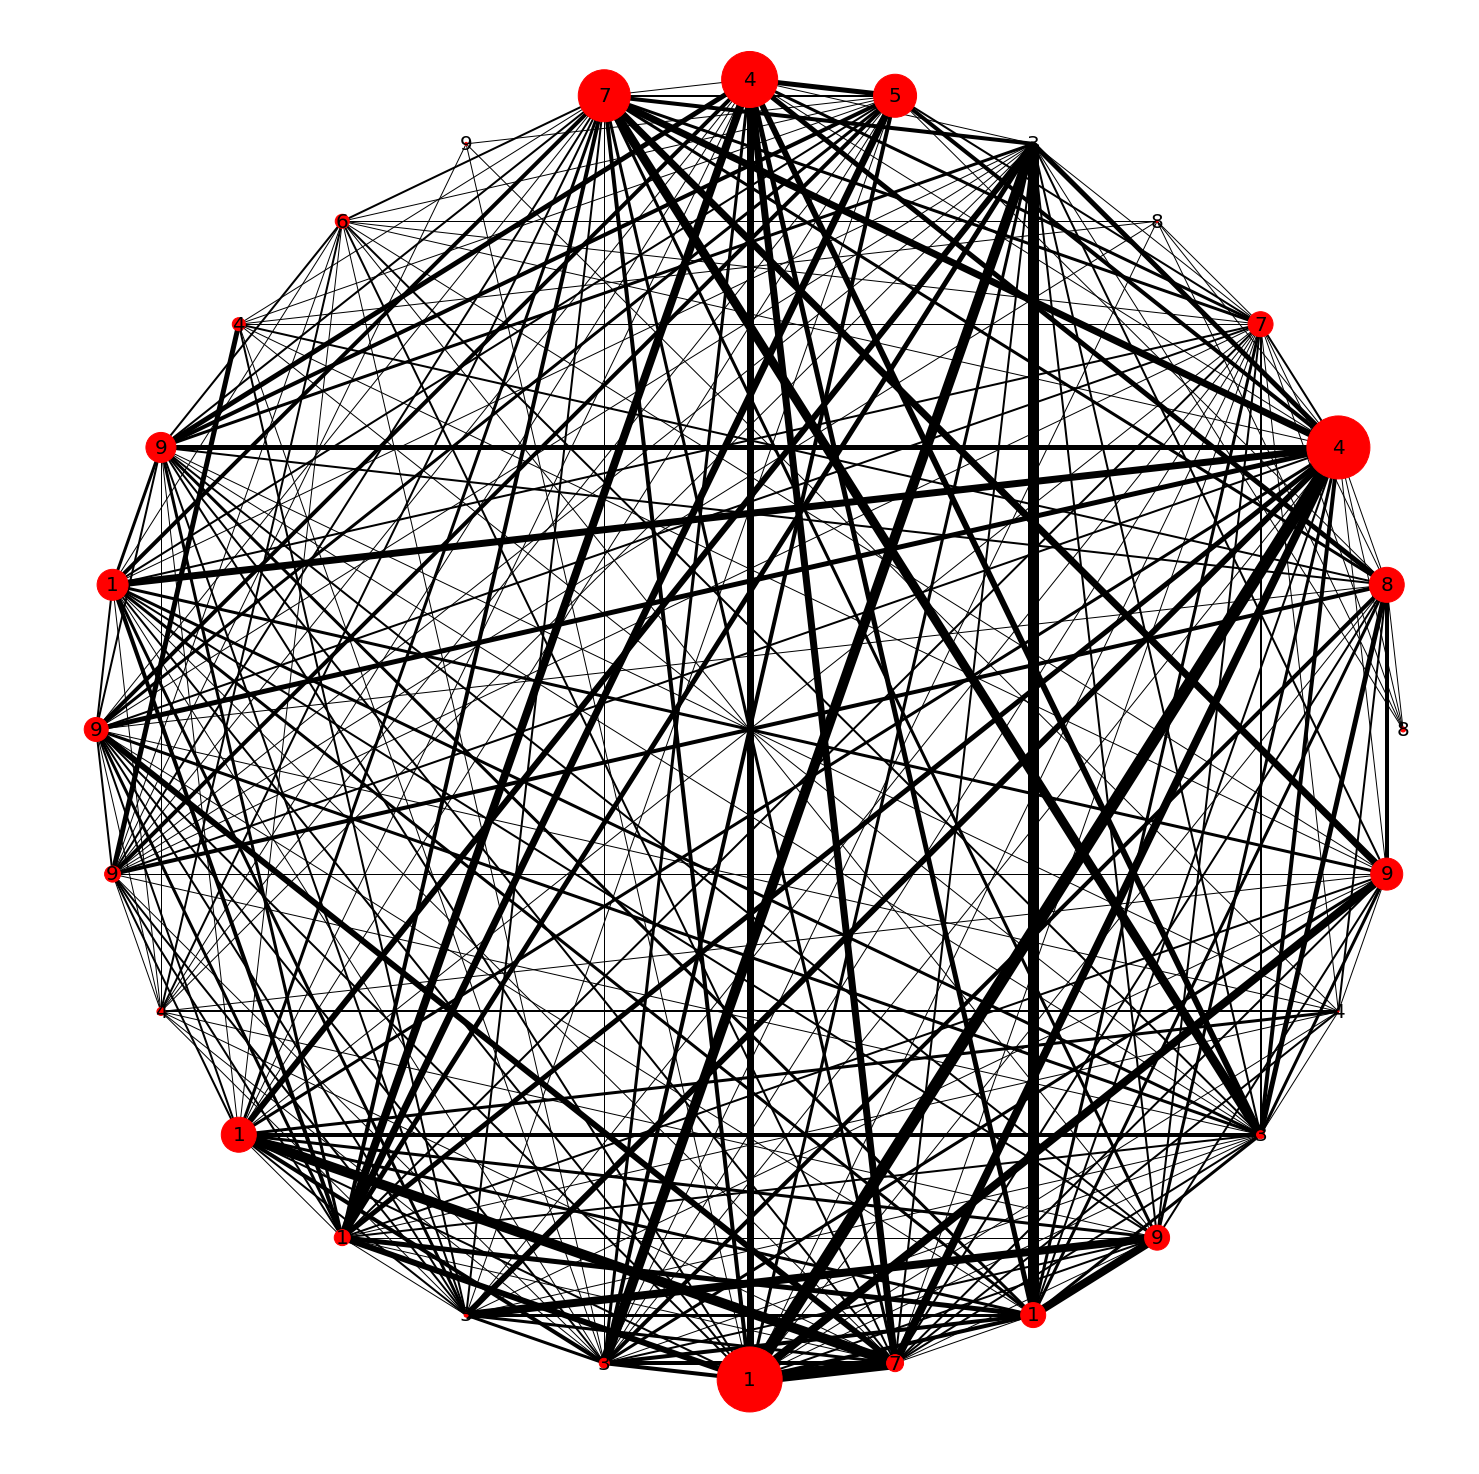

In [27]:
#ps=nx.spring_layout(G,scale=3)
ps=nx.circular_layout(G,scale=3)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
plt.figure(figsize=(20,20))
#nx.draw(G, pos=ps, edgelist=edges, width=weights, nodelist=dict(nx.degree(G, weight='weight')).keys(), node_size=[v * v for v in dict(nx.degree(G, weight='weight')).values()])
nx.draw(G, pos=ps, edgelist=edges, width=weights, nodelist=nx.get_node_attributes(G,'dominate').keys(), node_size=[v * v for v in nx.get_node_attributes(G,'dominate').values()])
#nx.draw(G, pos=ps, nodelist=nx.get_node_attributes(G,'dominate').keys(), node_size=[v * v for v in nx.get_node_attributes(G,'dominate').values()])
nx.draw_networkx_labels(G,pos=ps,labels=nx.get_node_attributes(G,'age'), font_size=20,font_family='sans-serif')
#edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G, ps, edge_labels=edge_labels, label_pos=0.3, font_size=7)
plt.show()

In [41]:
ps

{'1': array([  3.00000000e+00,   7.77017304e-09]),
 '10': array([-1.30165152,  2.70290655]),
 '11': array([-1.87046937,  2.34549451]),
 '12': array([-2.34549449,  1.87046921]),
 '13': array([-2.70290652,  1.30165145]),
 '14': array([-2.92478368,  0.6675628 ]),
 '15': array([ -2.99999997e+00,  -2.54498156e-07]),
 '16': array([-2.92478368, -0.66756261]),
 '17': array([-2.70290652, -1.30165126]),
 '18': array([-2.34549466, -1.8704692 ]),
 '19': array([-1.87046883, -2.34549485]),
 '2': array([ 2.92478371,  0.6675628 ]),
 '20': array([-1.3016517 , -2.70290635]),
 '21': array([-0.66756301, -2.92478369]),
 '22': array([  4.87596569e-08,  -2.99999998e+00]),
 '23': array([ 0.66756312, -2.92478369]),
 '24': array([ 1.30165172, -2.70290635]),
 '25': array([ 1.87046904, -2.34549485]),
 '26': array([ 2.34549433, -1.87046955]),
 '27': array([ 2.70290655, -1.30165126]),
 '28': array([ 2.92478371, -0.66756256]),
 '3': array([ 2.70290655,  1.30165127]),
 '4': array([ 2.34549451,  1.87046939]),
 '5': ar

In [46]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes, NodesOnly
from bokeh.palettes import Spectral4

#G=nx.karate_club_graph()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),\
              tools=TOOLS)

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = NodesOnly()

plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...

In [29]:
df_se[df_se['source'] == '9']

,source,target,weight
66,9,28,7
67,9,11,2
68,9,4,3
69,9,13,2
70,9,14,4
71,9,15,1
72,9,23,3
73,9,16,2
74,9,17,2
75,9,18,3


In [30]:
df_sa

,id,age
0,1,8
1,2,8
2,3,4
3,4,7
4,5,8
5,6,3
6,7,5
7,8,4
8,9,7
9,10,9
